# Prerequisite Test Solutions


### 1. Matrix Multiplication Complexity

**Question:** How many multiplications and additions are needed for a matrix multiplication between an (n, k) and a (k, m) matrix? Explain your reasoning.

To compute each element of the resulting (n, m) matrix, we perform a dot product of a row from the first matrix (with k elements) and a column from the second matrix (with k elements). This dot product requires **k multiplications** and **k-1 additions**.

Since there are **n * m** elements in the resulting matrix, the total number of operations are:

* **Total Multiplications:** $n \times m \times k$
* **Total Additions:** $n \times m \times (k - 1)$

### 2. Matrix Multiplication in Python

**Question:** Write Python code to multiply the two matrices from the previous question. Implement the solution using both a list of lists and NumPy. Compare the execution time of both methods. Which one is faster and why?

In [1]:
import numpy as np
import time

def multiply_list_of_lists(A, B):
    n, k1 = len(A), len(A[0])
    k2, m = len(B), len(B[0])
    if k1 != k2:
        raise ValueError("Matrices are not compatible for multiplication")

    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for k in range(k1):
                C[i][j] += A[i][k] * B[k][j]
    return C

n, k, m = 100, 50, 120

list_A = [[np.random.rand() for _ in range(k)] for _ in range(n)]
list_B = [[np.random.rand() for _ in range(m)] for _ in range(k)]

start_time = time.time()
list_C = multiply_list_of_lists(list_A, list_B)
list_time = time.time() - start_time
print(f"List of lists multiplication time: {list_time:.6f} seconds")

np_A = np.array(list_A)
np_B = np.array(list_B)

start_time = time.time()
np_C = np.dot(np_A, np_B)
np_time = time.time() - start_time
print(f"NumPy multiplication time: {np_time:.6f} seconds")

print(f"\nNumPy is approximately {list_time/np_time:.2f} times faster.")

List of lists multiplication time: 0.067884 seconds
NumPy multiplication time: 0.004474 seconds

NumPy is approximately 15.17 times faster.


**Why NumPy is faster:**

NumPy is significantly faster because its core operations are implemented in C and Fortran, which are compiled languages. This allows for highly optimized, low-level code that operates directly on memory. In contrast, standard Python lists are interpreted, and the nested loops for matrix multiplication involve a lot of Python-level overhead for each operation.

### 3. Median Finding

**Question:** Finding the highest element in a list requires one pass. Finding the second highest requires two passes. Using this logic, what is the time complexity to find the median of an array? Can you suggest a more efficient method? Implement both methods in Python and compare their execution time against NumPy's `numpy.median` function.

The naive approach of finding the k-th smallest element by repeatedly finding and removing the minimum element would have a time complexity of **O(n\*k)**, where n is the number of elements in the array. To find the median (which is the n/2-th smallest element), this would be **O(n²)**.

A more efficient method is to first sort the array, which takes **O(n log n)** time, and then access the middle element in **O(1)** time.

In [2]:
import numpy as np
import time

def naive_median(arr):
    n = len(arr)
    if n % 2 == 1:
        k = n // 2
        temp_arr = list(arr)
        for _ in range(k):
            min_val = min(temp_arr)
            temp_arr.remove(min_val)
        return min(temp_arr)
    else:
        k1 = n // 2 -1
        k2 = n // 2
        temp_arr = list(arr)
        for _ in range(k1):
            min_val = min(temp_arr)
            temp_arr.remove(min_val)
        val1 = min(temp_arr)
        temp_arr.remove(val1)
        val2 = min(temp_arr)
        return (val1 + val2) / 2

def sorting_median(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n//2]
    else:
        return (sorted_arr[n//2 - 1] + sorted_arr[n//2]) / 2

test_array = np.random.rand(1001)

start_time = time.time()
naive_median_val = naive_median(list(test_array))
naive_time = time.time() - start_time
print(f"Naive median time: {naive_time:.6f} seconds")

start_time = time.time()
sorting_median_val = sorting_median(list(test_array))
sorting_time = time.time() - start_time
print(f"Sorting median time: {sorting_time:.6f} seconds")

start_time = time.time()
numpy_median_val = np.median(test_array)
numpy_time = time.time() - start_time
print(f"NumPy median time: {numpy_time:.6f} seconds")

print(f"\nNaive median: {naive_median_val}")
print(f"Sorting median: {sorting_median_val}")
print(f"NumPy median: {numpy_median_val}")

Naive median time: 0.029836 seconds
Sorting median time: 0.000703 seconds
NumPy median time: 0.004185 seconds

Naive median: 0.4697689871263484
Sorting median: 0.4697689871263484
NumPy median: 0.4697689871263484


### 4. Gradient Calculation

**Question:** What is the gradient of the function $f(x, y) = x^2y + y^3\sin(x)$ with respect to x and y?

The gradient of a multivariable function is a vector of its partial derivatives.

* **Partial derivative with respect to x (∂f/∂x):**
    $2xy + y^3\cos(x)$
* **Partial derivative with respect to y (∂f/∂y):**
    $x^2 + 3y^2\sin(x)$

So, the gradient ∇f is:
**∇f(x, y) = [ $2xy + y^3\cos(x)$,  $x^2 + 3y^2\sin(x)$ ]**

### 5 and 6. Gradient Verification with JAX and SymPy

**Question:** Use JAX to verify that the gradient you calculated matches the analytical solution for a few random values of x and y.

In [ ]:
!pip install jax

In [14]:
import sympy
import jax
import jax.numpy as jnp
import numpy as np

# --- Define the point and function for all methods ---
x_val, y_val = 2.0, 3.0
f = lambda x, y: x**2 * y + y**3 * np.sin(x)
print(f"Calculating gradient of f(x,y) = x²y + y³sin(x) at point ({x_val}, {y_val})\n")


# Method 1: Analytical Gradient with SymPy (Ground Truth) --------------------
x_sym, y_sym = sympy.symbols('x y')
f_sym = x_sym**2 * y_sym + y_sym**3 * sympy.sin(x_sym)

grad_x_sym = sympy.diff(f_sym, x_sym)
grad_y_sym = sympy.diff(f_sym, y_sym)

# Evaluate the analytical expression at the specific point
analytical_grad_x = grad_x_sym.subs({x_sym: x_val, y_sym: y_val}).evalf()
analytical_grad_y = grad_y_sym.subs({x_sym: x_val, y_sym: y_val}).evalf()

print("1. Analytical Method (SymPy)")
print(f"∂f/∂x formula: {grad_x_sym}")
print(f"∂f/∂y formula: {grad_y_sym}")
print(f"Result: [{analytical_grad_x:.8f}, {analytical_grad_y:.8f}]\n")


# Method 2: Numerical Approximation (Finite Differences) -------------------
def finite_difference_grad(func, x, y, h=1e-7):
    # Partial derivative with respect to x
    df_dx = (func(x + h, y) - func(x, y)) / h
    # Partial derivative with respect to y
    df_dy = (func(x, y + h) - func(x, y)) / h
    return df_dx, df_dy

numerical_grad = finite_difference_grad(f, x_val, y_val)

print("2. Numerical Approximation (Finite Differences)")
print("Approximates the derivative using f'(x) ≈ (f(x+h) - f(x))/h.")
print(f"Result: [{numerical_grad[0]:.8f}, {numerical_grad[1]:.8f}]\n")


# Method 3: Automatic Differentiation with JAX -----------------------------
def f_jax(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

jax_grad_func = jax.grad(f_jax, argnums=(0, 1))
autodiff_grad = jax_grad_func(x_val, y_val)

print("3. Automatic Differentiation (JAX)")
print("Computes the exact derivative value algorithmically.")
print(f"Result: [{autodiff_grad[0]:.8f}, {autodiff_grad[1]:.8f}]\n")

# --- Summary ---
print("="*35)
print("              SUMMARY OF RESULTS")
print("="*35)
print(f"Analytical (SymPy):  [{float(analytical_grad_x):.8f}, {float(analytical_grad_y):.8f}]")
print(f"Numerical (Finite Δ):[{numerical_grad[0]:.8f}, {numerical_grad[1]:.8f}]")
print(f"AutoDiff (JAX):      [{autodiff_grad[0]:.8f}, {autodiff_grad[1]:.8f}]")
print("="*35)

Calculating gradient of f(x,y) = x²y + y³sin(x) at point (2.0, 3.0)

1. Analytical Method (SymPy)
∂f/∂x formula: 2*x*y + y**3*cos(x)
∂f/∂y formula: x**2 + 3*y**2*sin(x)
Result: [0.76403541, 28.55103052]

2. Numerical Approximation (Finite Differences)
Approximates the derivative using f'(x) ≈ (f(x+h) - f(x))/h.
Result: [0.76403445, 28.55103126]

3. Automatic Differentiation (JAX)
Computes the exact derivative value algorithmically.
Result: [0.76403522, 28.55102921]

              SUMMARY OF RESULTS
Analytical (SymPy):  [0.76403541, 28.55103052]
Numerical (Finite Δ):[0.76403445, 28.55103126]
AutoDiff (JAX):      [0.76403522, 28.55102921]


### 7. Hierarchical Data with Dictionaries

**Question:** Create a nested Python dictionary to represent hierarchical student data, including year, branch, roll number, name, and marks in various subjects.

In [6]:
student_data_dict = {
    2023: {
        "Computer Science": [
            {
                "roll_number": "CS01",
                "name": "Alice",
                "marks": {"Math": 90, "Physics": 85, "Programming": 95}
            },
            {
                "roll_number": "CS02",
                "name": "Bob",
                "marks": {"Math": 88, "Physics": 92, "Programming": 89}
            }
        ],
        "Electrical Engineering": [
            {
                "roll_number": "EE01",
                "name": "Charlie",
                "marks": {"Math": 95, "Physics": 88, "Circuits": 91}
            }
        ]
    },
    2024: {
        "Computer Science": [
            {
                "roll_number": "CS03",
                "name": "David",
                "marks": {"Math": 78, "Physics": 81, "Programming": 92}
            }
        ]
    }
}

import json
print(json.dumps(student_data_dict, indent=4))

{
    "2023": {
        "Computer Science": [
            {
                "roll_number": "CS01",
                "name": "Alice",
                "marks": {
                    "Math": 90,
                    "Physics": 85,
                    "Programming": 95
                }
            },
            {
                "roll_number": "CS02",
                "name": "Bob",
                "marks": {
                    "Math": 88,
                    "Physics": 92,
                    "Programming": 89
                }
            }
        ],
        "Electrical Engineering": [
            {
                "roll_number": "EE01",
                "name": "Charlie",
                "marks": {
                    "Math": 95,
                    "Physics": 88,
                    "Circuits": 91
                }
            }
        ]
    },
    "2024": {
        "Computer Science": [
            {
                "roll_number": "CS03",
                "name": "David",
            

### 8. Hierarchical Data with Classes

**Question:** Represent the same student information using Python classes. The overall structure should be a database (list) of year objects, where each year object contains a list of branch objects, and each branch object contains a list of student objects with their properties and marks.

In [7]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

# Create instances
student1 = Student("CS01", "Alice", {"Math": 90, "Physics": 85, "Programming": 95})
student2 = Student("CS02", "Bob", {"Math": 88, "Physics": 92, "Programming": 89})
cs_branch_2023 = Branch("Computer Science")
cs_branch_2023.add_student(student1)
cs_branch_2023.add_student(student2)

student3 = Student("EE01", "Charlie", {"Math": 95, "Physics": 88, "Circuits": 91})
ee_branch_2023 = Branch("Electrical Engineering")
ee_branch_2023.add_student(student3)

year_2023 = Year(2023)
year_2023.add_branch(cs_branch_2023)
year_2023.add_branch(ee_branch_2023)

database = [year_2023]

# Example of accessing data
print(f"Year: {database[0].year}")
print(f"Branch: {database[0].branches[0].name}")
print(f"Student Name: {database[0].branches[0].students[0].name}")
print(f"Student Marks: {database[0].branches[0].students[0].marks}")

Year: 2023
Branch: Computer Science
Student Name: Alice
Student Marks: {'Math': 90, 'Physics': 85, 'Programming': 95}


### 9. Plotting Functions

**Question:** Using matplotlib, plot the following functions on the domain x = 0.5 to 100.0 in steps of 0.5:
y = x, y = x², y = (x³)/100, y = sin(x), y = sin(x)/x, y = log(x), y = eˣ

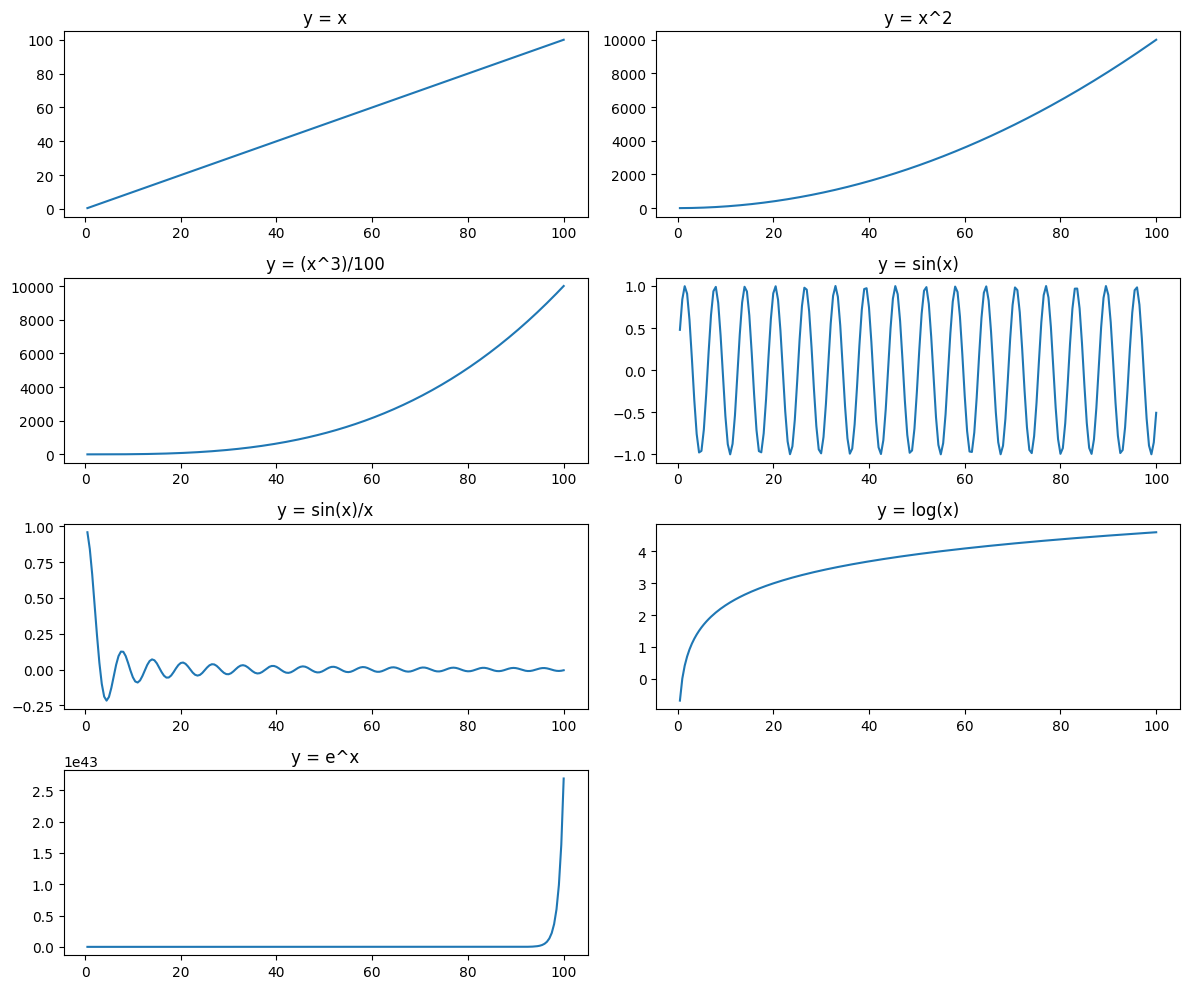

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)

y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(12, 10))

plt.subplot(4, 2, 1)
plt.plot(x, y1)
plt.title('y = x')

plt.subplot(4, 2, 2)
plt.plot(x, y2)
plt.title('y = x^2')

plt.subplot(4, 2, 3)
plt.plot(x, y3)
plt.title('y = (x^3)/100')

plt.subplot(4, 2, 4)
plt.plot(x, y4)
plt.title('y = sin(x)')

plt.subplot(4, 2, 5)
plt.plot(x, y5)
plt.title('y = sin(x)/x')

plt.subplot(4, 2, 6)
plt.plot(x, y6)
plt.title('y = log(x)')

plt.subplot(4, 2, 7)
plt.plot(x, y7)
plt.title('y = e^x')

plt.tight_layout()
plt.show()

### 10. Pandas DataFrame Operations (Part 1)

**Question:** Generate a 20x5 NumPy matrix with random numbers uniformly distributed between 1 and 2. Create a Pandas DataFrame from this matrix with column names "a", "b", "c", "d", and "e". Find the column with the highest standard deviation and the row with the lowest mean.

In [9]:
import numpy as np
import pandas as pd

np.random.seed(0)
data = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])

print("DataFrame head:")
print(df.head())

col_std = df.std()
highest_std_col = col_std.idxmax()
print(f"\nColumn with highest standard deviation: {highest_std_col}")
print(f"Standard deviation value: {col_std.max()}")

row_mean = df.mean(axis=1)
lowest_mean_row = row_mean.idxmin()
print(f"\nRow with lowest mean: {lowest_mean_row}")
print(f"Mean value: {row_mean.min()}")

DataFrame head:
          a         b         c         d         e
0  1.548814  1.715189  1.602763  1.544883  1.423655
1  1.645894  1.437587  1.891773  1.963663  1.383442
2  1.791725  1.528895  1.568045  1.925597  1.071036
3  1.087129  1.020218  1.832620  1.778157  1.870012
4  1.978618  1.799159  1.461479  1.780529  1.118274

Column with highest standard deviation: c
Standard deviation value: 0.34346618256567985

Row with lowest mean: 15
Mean value: 1.1714118465040577


### 11. Pandas DataFrame Operations (Part 2)

**Question:** Add a new column "f" to the DataFrame, which is the sum of columns "a", "b", "c", "d", and "e". Create another column "g" with the value "LT8" if the value in column "f" is less than 8, and "GT8" otherwise. Find the number of rows where the value in column "g" is "LT8". Also, find the standard deviation of column "f" for the rows where "g" is "LT8" and "GT8", respectively.

In [10]:
import numpy as np
import pandas as pd

np.random.seed(0)
data = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print("DataFrame with new columns 'f' and 'g':")
print(df.head())

lt8_count = df[df['g'] == 'LT8'].shape[0]
print(f"\nNumber of rows where g is 'LT8': {lt8_count}")

std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()
print(f"\nStandard deviation of 'f' for 'LT8' rows: {std_lt8:.4f}")
print(f"Standard deviation of 'f' for 'GT8' rows: {std_gt8:.4f}")

DataFrame with new columns 'f' and 'g':
          a         b         c         d         e         f    g
0  1.548814  1.715189  1.602763  1.544883  1.423655  7.835304  LT8
1  1.645894  1.437587  1.891773  1.963663  1.383442  8.322359  GT8
2  1.791725  1.528895  1.568045  1.925597  1.071036  7.885297  LT8
3  1.087129  1.020218  1.832620  1.778157  1.870012  7.588136  LT8
4  1.978618  1.799159  1.461479  1.780529  1.118274  8.138060  GT8

Number of rows where g is 'LT8': 16

Standard deviation of 'f' for 'LT8' rows: 0.5551
Standard deviation of 'f' for 'GT8' rows: 0.2654


### 12. NumPy Broadcasting

**Question:** Write a short piece of code to demonstrate broadcasting in NumPy.

In [11]:
import numpy as np

a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Create a 1x3 array (or a 1D array of size 3)
b = np.array([10, 20, 30])

# Add b to each row of a.
# b is "broadcast" across the rows of a.
c = a + b

print("Array a:\n", a)
print("\nArray b:\n", b)
print("\nArray a + b (after broadcasting):\n", c)

Array a:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Array b:
 [10 20 30]

Array a + b (after broadcasting):
 [[11 22 33]
 [14 25 36]
 [17 28 39]]


### 13. NumPy Argmin

**Question:** Write a function to find the index of the minimum element (argmin) in a NumPy array. You can use `np.argmin` to verify your solution.

In [12]:
import numpy as np

def find_argmin(arr):
    if arr.size == 0:
        return None

    min_val = arr.flat[0]
    min_idx = 0
    for i, val in enumerate(arr.flat):
        if val < min_val:
            min_val = val
            min_idx = i

    return np.unravel_index(min_idx, arr.shape)


test_array = np.random.rand(4, 5)
print("Test Array:\n", test_array)

my_argmin = find_argmin(test_array)
numpy_argmin = np.unravel_index(np.argmin(test_array), test_array.shape)

print(f"\nMy argmin result: {my_argmin}")
print(f"NumPy's argmin result: {numpy_argmin}")

print(f"\nVerification: {my_argmin == numpy_argmin}")

Test Array:
 [[0.67781654 0.27000797 0.73519402 0.96218855 0.24875314]
 [0.57615733 0.59204193 0.57225191 0.22308163 0.95274901]
 [0.44712538 0.84640867 0.69947928 0.29743695 0.81379782]
 [0.39650574 0.8811032  0.58127287 0.88173536 0.69253159]]

My argmin result: (np.int64(1), np.int64(3))
NumPy's argmin result: (np.int64(1), np.int64(3))

Verification: True
